## Partial Derivatives & Symbolic Computation

In [33]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from sympy import symbols, diff
from math import log

In [34]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [35]:
a, b = symbols('x, y')
print('Our cost function f(X, y) is:', f(a, b))
print('Partial derivative wrt X is:', diff(f(a,b), a))
print('Value of f(x,y) at x=1.8 y=1.0 is:', f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x:', diff(f(a,b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(X, y) is: 1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt X is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is: 0.990604794032582
Value of partial derivative wrt x: 0.0368089716197505


## Batch Gradient Descent with SymPy
## $\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$

In [36]:
# Setup - calculating with SymPy (more resource intensive)
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [1.39396411456848e-10 1.39396411456848e-10]
Minimum occurs at x value of:  2.72505702715449e-10
Minimum occurs at y value of:  -0.799999999727494
The cost is:  0.668877351069885


In [37]:
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [38]:
# Setup - calculating without SymPy (less resource intensive)
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


## Graphing 3d Gradient Descent & Adv Numpy Arrays

In [39]:
# Setup - calculating without SymPy (less resource intensive)
multiplier = 0.1
max_iter = 500
params = np.array([1.0, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [4.72067007e-13 4.72067007e-13]
Minimum occurs at x value of:  8.121811144926193e-13
Minimum occurs at y value of:  8.121811144926193e-13
The cost is:  0.5


In [40]:
# make x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid:', x_4.shape)

Shape of X array (200,)
Array after meshgrid: (200, 200)


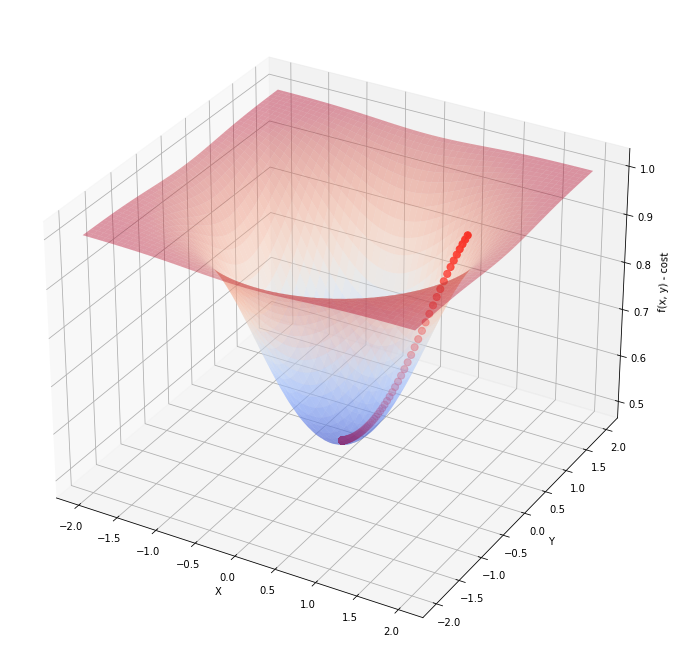

In [41]:
# generating 3d plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y) - cost')

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1],
          f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()